<a href="https://colab.research.google.com/github/thesteuber/assign03-50-steuber/blob/5-carry-out-cross-validation/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning - Assignment 3 "Employee Churn" 


##Purpose
Gain experience applying scikit learn to machine learning problems.

##Import Python Libraries
Run the following python to initiliaze all the needed libraries for the notebook.

In [1]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

##Tasks

###1. Create a new notebook 


---


Create a new notebook named "churn-prediction", and properly document the notebook with descriptions of the tasks.

Task completed as seen in this notebook.

###2. Read in HR Data


---


Using the scikit-demo-solutions notebook as a guide, read in the HR data.

In [2]:
attrition_data = pd.read_excel('https://raw.githubusercontent.com/vanderbilt-ml/assign03/main/IBM-HR-Data-Employee-Attrition.xlsx')
display(attrition_data.head())
attrition_data.info()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###3. Split the Data


---


Split the data for train and test.

In [33]:
class_column = 'Attrition'
random_seed = 1709

X_train, X_test, y_train, y_test = train_test_split(attrition_data.drop(columns=class_column), attrition_data[class_column], test_size=0.25, random_state=random_seed)

Add a quick sanity check:

In [34]:
print('On train: ')
print('Train dimensions: ', train.shape)
display(train.head())

On train: 
Train dimensions:  (1102, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
191,27,No,Travel_Rarely,894,Research & Development,9,3,Medical,1,260,...,4,80,0,7,2,2,7,7,0,3
1198,33,No,Non-Travel,530,Sales,16,3,Life Sciences,1,1681,...,3,80,1,7,2,3,6,5,1,2
747,38,No,Travel_Rarely,1035,Sales,3,4,Life Sciences,1,1036,...,3,80,0,19,1,3,1,0,0,0
339,27,No,Travel_Rarely,1130,Sales,8,4,Marketing,1,458,...,1,80,1,8,3,3,8,7,0,7
668,28,No,Travel_Rarely,995,Research & Development,9,3,Medical,1,930,...,2,80,1,6,2,3,2,2,2,2


###4. Build Pipeline


---


Build an appropriate training pipeline.

I will end up doing the same kind of pipelines that were in the sklean-demo-solutions, as I am unsure as to what fulfills "appropiate" here. 

In [35]:
#individual pipelines for differing datatypes
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder(drop='if_binary'))])
num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
                               ('scale_num', StandardScaler())])

In [36]:
#establish preprocessing pipeline by columns
preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

In [37]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f568a3a4350>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f56884990d0>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

###5. Cross Validation


---


Carry out cross-validation

In [38]:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [39]:
tuning_grid

{'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
 'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])}

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(drop='if_binary'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f568a3a4350>),
                                                                        ('num_pipe',
                                                    

In [41]:
print(grid_search.best_score_)
grid_search.best_params_

0.8820485396955986


{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}

In [43]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042539,0.006251,0.007392,0.000644,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.868778,0.877828,0.868182,...,0.882049,0.013328,1,0.901249,0.893303,0.900227,0.891156,0.888889,0.894965,0.004927
1,0.064322,0.003115,0.007624,0.000096,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.864253,0.873303,0.868182,...,0.879329,0.013778,2,0.895573,0.889898,0.894558,0.884354,0.885488,0.889974,0.004563
2,0.060916,0.001902,0.008853,0.001678,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.873303,0.859729,0.868182,...,0.873879,0.009507,3,0.884222,0.888763,0.880952,0.877551,0.876417,0.881581,0.004513
3,0.052789,0.002691,0.007852,0.000270,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.868778,0.850679,0.868182,...,0.868437,0.010129,14,0.883087,0.888763,0.874150,0.869615,0.870748,0.877273,0.007440
4,0.048579,0.004212,0.007877,0.000389,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.859729,0.841629,0.859091,...,0.862999,0.013649,15,0.874007,0.877412,0.869615,0.861678,0.861678,0.868878,0.006377
5,0.055200,0.011589,0.007825,0.000206,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864253,0.868778,0.854545,...,0.871152,0.015297,7,0.897843,0.905789,0.900227,0.897959,0.895692,0.899502,0.003455
6,0.068052,0.016069,0.008967,0.001067,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864253,0.868778,0.854545,...,0.871152,0.015297,7,0.897843,0.905789,0.900227,0.896825,0.894558,0.899048,0.003831
7,0.067101,0.016954,0.009142,0.002775,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864253,0.868778,0.854545,...,0.871152,0.015297,7,0.897843,0.905789,0.900227,0.896825,0.894558,0.899048,0.003831
8,0.066391,0.017402,0.007774,0.000314,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864253,0.868778,0.854545,...,0.870243,0.015579,13,0.897843,0.905789,0.900227,0.896825,0.894558,0.899048,0.003831
9,0.071371,0.021805,0.008681,0.000760,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.868778,0.868778,0.854545,...,0.872057,0.014993,5,0.897843,0.905789,0.900227,0.896825,0.894558,0.899048,0.003831


In [44]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f568845b590>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                

In [45]:
grid_search.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
vip = grid_search.best_estimator_['mdl'].coef_[0]
vip

array([-0.56969039,  0.48933628, -0.21726045, -0.00580095, -0.35746227,
        0.06564866,  0.05094827, -0.22682814,  0.13356246, -0.31639292,
       -0.20412621,  0.26522198,  0.19122192, -0.26457443,  0.02061257,
        0.36856419,  0.04852024, -0.27837126, -0.1827398 , -0.14461841,
       -0.10685415,  0.2418465 , -0.3016801 , -0.29396956,  0.29803511,
       -0.29761456,  1.22165601, -0.23840654, -0.10444401,  0.26126352,
        0.03991967,  0.        , -0.02968536, -0.37775159, -0.02010659,
       -0.30243289, -0.20714655, -0.40415555, -0.09062566,  0.00357105,
        0.31177531, -0.07433267,  0.02249833, -0.23222991,  0.        ,
       -0.27155487, -0.31415395, -0.11928431, -0.15236459, -0.00523242,
       -0.31352001,  0.41863246, -0.21671732])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


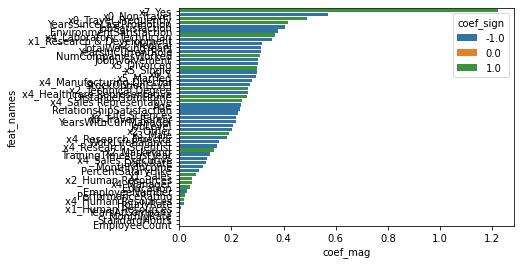

In [47]:
#get names in correct preproc order
cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names()
num_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

In [48]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       306
         Yes       0.85      0.27      0.41        62

    accuracy                           0.87       368
   macro avg       0.86      0.63      0.67       368
weighted avg       0.87      0.87      0.84       368



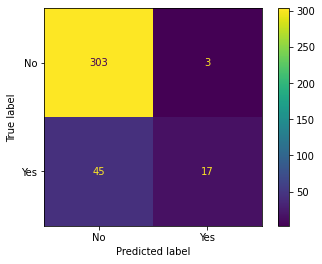

In [49]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()